In [2]:
# Importa csv a pandas
import pandas as pd
import os

In [3]:
# Lee el archivo CSV sepsis_data.csv
file_path = os.path.join(os.path.dirname('C:/repos/'), 'sepsis_data.csv')
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [21]:
data = data.drop(columns=['Unnamed: 0'])

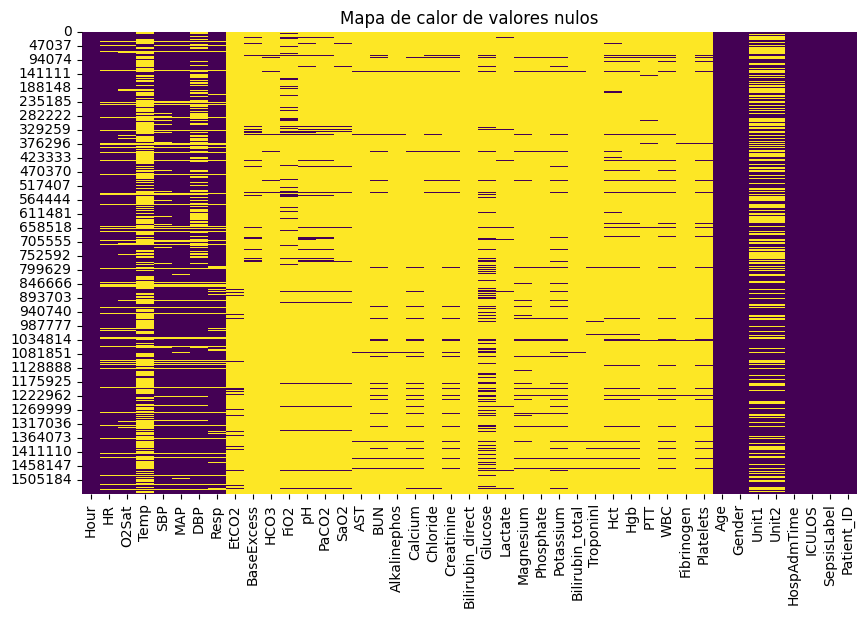

In [22]:
# Grafica la distribucion de valores nulos en cada columna
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

In [5]:
# Crea el nuevo DataFrame con las columnas seleccionadas
selected_columns = [
    'SepsisLabel',
    'Age',
    'Gender',
    'HR',
    'Temp',
    'O2Sat',
    'MAP',
    'ICULOS',
    'Glucose',
    'Creatinine'
]

data_selected = data[selected_columns]

In [6]:
# Muestra las primeras filas y la información del nuevo DataFrame
data_selected.head()

,SepsisLabel,Age,Gender,HR,Temp,O2Sat,MAP,ICULOS,Glucose,Creatinine
0,0,68.54,0,NaN,NaN,NaN,NaN,1,NaN,NaN
1,0,68.54,0,65.0,NaN,100.0,72.0,2,NaN,NaN
2,0,68.54,0,78.0,NaN,100.0,42.5,3,NaN,NaN
3,0,68.54,0,73.0,NaN,100.0,NaN,4,NaN,NaN
4,0,68.54,0,70.0,NaN,100.0,74.0,5,161.0,0.8


In [7]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   SepsisLabel  1552210 non-null  int64  
 1   Age          1552210 non-null  float64
 2   Gender       1552210 non-null  int64  
 3   HR           1398811 non-null  float64
 4   Temp         525226 non-null   float64
 5   O2Sat        1349474 non-null  float64
 6   MAP          1358940 non-null  float64
 7   ICULOS       1552210 non-null  int64  
 8   Glucose      265516 non-null   float64
 9   Creatinine   94616 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 118.4 MB


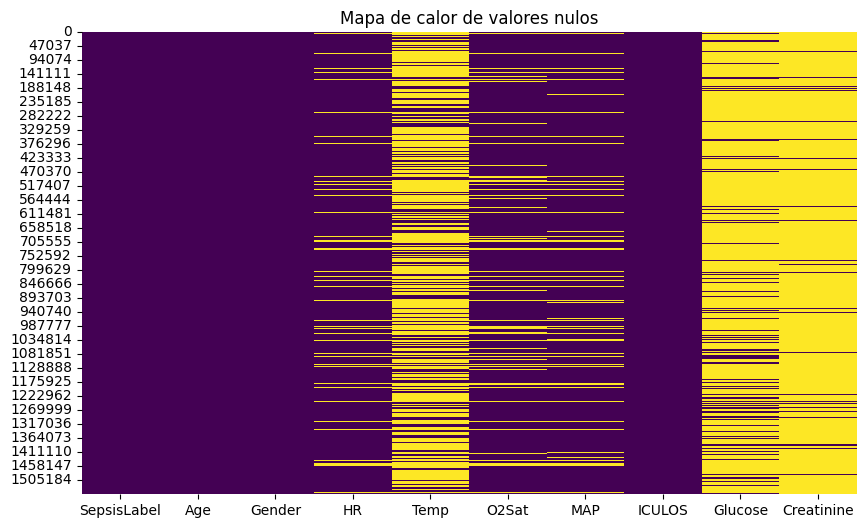

In [10]:
# Grafica la distribucion de valores nulos en cada columna
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(data_selected.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

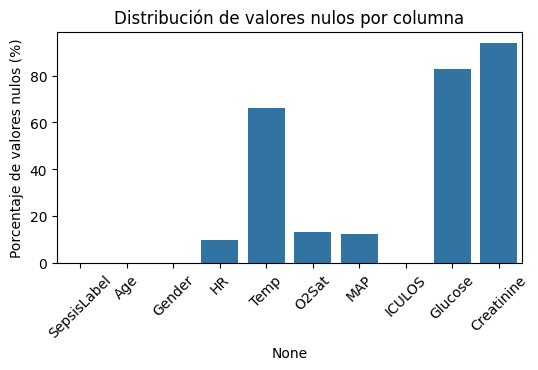

In [32]:
# Grafica la distribucion porcentual de valores nulos en cada columna
null_percentage = data_selected.isnull().mean() * 100
plt.figure(figsize=(6, 3))
sns.barplot(x=null_percentage.index, y=null_percentage.values)
plt.ylabel('Porcentaje de valores nulos (%)')
plt.xticks(rotation=45)
plt.title('Distribución de valores nulos por columna')
plt.show()

In [13]:
data_selected.columns

Index(['SepsisLabel', 'Age', 'Gender', 'HR', 'Temp', 'O2Sat', 'MAP', 'ICULOS',
       'Glucose', 'Creatinine'],
      dtype='object')

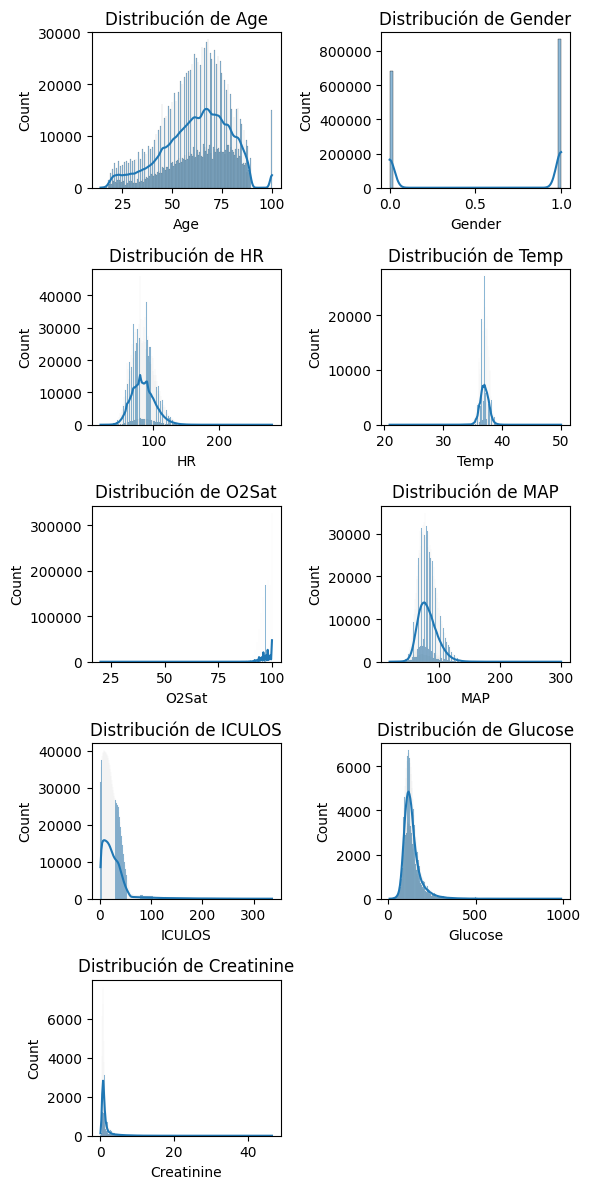

In [31]:
# Grafica los histogramas de las variables numéricas
numeric_columns = ['Age', 'Gender', 'HR', 'Temp', 'O2Sat', 'MAP', 'ICULOS',
       'Glucose', 'Creatinine']
plt.figure(figsize=(6, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data_selected[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

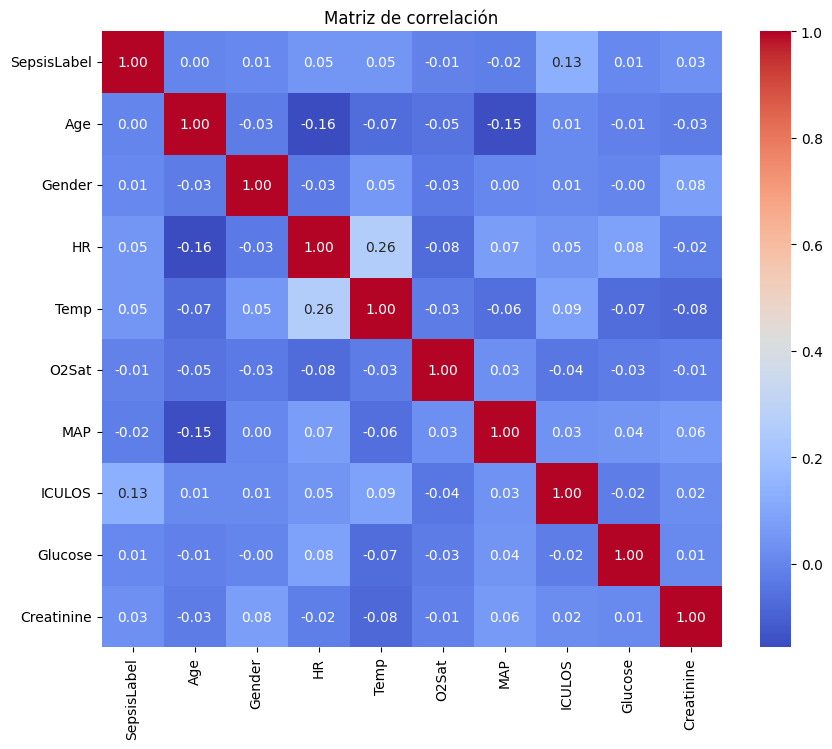

In [16]:
# Grfica la correlacion entre variables numericas
plt.figure(figsize=(10, 8))
correlation_matrix = data_selected.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

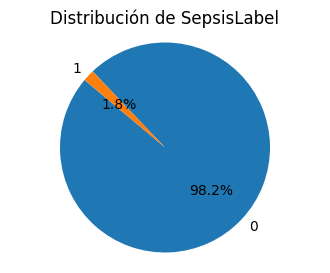

In [23]:
# Grafica la distribución de la variable objetivo 'SepsisLabel' con pie chart incluyedo tabla de frecuencias
sepsis_counts = data_selected['SepsisLabel'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(sepsis_counts, labels=sepsis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de SepsisLabel')
plt.axis('equal')
plt.show()

In [26]:
# Conteo de clases en la variable objetivo y proporcion
sepsis_counts= data_selected['SepsisLabel'].value_counts()
sepsis_counts, sepsis_proportion = sepsis_counts, sepsis_counts / len(data_selected)
print(sepsis_counts)
print(sepsis_proportion)

SepsisLabel
0    1524294
1      27916
Name: count, dtype: int64
SepsisLabel
0    0.982015
1    0.017985
Name: count, dtype: float64
